In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import time
import traceback
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

In [85]:
"""
import all classes here
"""
import BinaryLogLoss
from Dense import Dense
from GradientDescentOptimizer import GradientDescentOptimizer
from Layer import Layer
from MomentumOptimizer import MomentumOptimizer
from Relu import Relu
from Sequential import Sequential
from Sigmoid import Sigmoid
from Softmax import Softmax
from SoftmaxCrossEntropyLoss import softmax_cross_entropy, softmax_cross_entropy_with_logits

In [45]:
df = pd.read_csv("fashion-mnist.csv")
df.head()

,kategori,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Normalize the dataset.

In [10]:
df=((df-df.min())/(df.max()-df.min()))*20

In [12]:
df.head()

,kategori,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,4.444444,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,20.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,13.333333,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.392157,0.0,...,0.000000,0.0,0.0,2.352941,3.372549,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.121951,0.176211,0.0,0.0,0.000000,0.0,...,0.235294,0.0,0.0,0.000000,0.000000,0.078431,0.0,0.0,0.0,0.0
4,6.666667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [13]:
# Split features and target.
features = df.drop(["kategori"], axis=1).values
target = df["kategori"].values

In [14]:
encoder = OneHotEncoder(categories='auto')
X, y = features, encoder.fit_transform(target.reshape(-1,1)).todense().astype(np.uint8)
X.shape

(60000, 784)

In [35]:
relu = Relu()

In [37]:
# example of X with 5 features and 10 example
x = np.linspace(-1,1,2*5).reshape([5,2])
x.shape

(5, 2)

In [38]:
x

array([[-1.        , -0.77777778],
       [-0.55555556, -0.33333333],
       [-0.11111111,  0.11111111],
       [ 0.33333333,  0.55555556],
       [ 0.77777778,  1.        ]])

In [39]:
relu.forward(x)

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.11111111],
       [0.33333333, 0.55555556],
       [0.77777778, 1.        ]])

to compute its gradient, we can specify: <br>
relu.backward(x, np.ones(x.shape)) <br>
it will tell you that dx / d( ... ) = 1 <br>
so that it will compute d ( ... ) / d(relu) = (d relu / dx) * (dx / d( ... )) <br>
= d ( ... ) / d(relu) = (d relu / dx) * 1 <br>
= d ( ... ) / d(relu) = (d relu / dx)

Note: ... = whatever you want or need

In [40]:
relu.backward(x, np.ones(x.shape))

[array([[0., 0.],
        [0., 0.],
        [0., 1.],
        [1., 1.],
        [1., 1.]])]

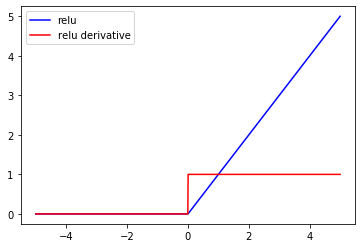

In [47]:
# You can change some of the variables for experiment!
x = np.linspace(-5,5, 1000).reshape(-1, 1000)
plt.plot(x[0], relu.forward(x)[0], 'b', x[0], relu.backward(x, np.ones(x.shape))[0][0], 'r')
plt.legend(['relu', 'relu derivative'], loc='best')
plt.show()

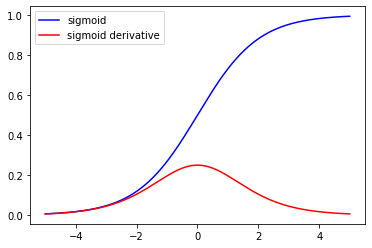

In [48]:
sigmoid = Sigmoid()
# You can change some of the variables for experiment!
x = np.linspace(-5,5, 1000).reshape(-1, 1000)
plt.plot(x[0], sigmoid.forward(x)[0], 'b', x[0], sigmoid.backward(x, np.ones(x.shape))[0][0], 'r')
plt.legend(['sigmoid', 'sigmoid derivative'], loc='best')
plt.show()

In [49]:
np.exp(100)

2.6881171418161356e+43

In [50]:
softmax = lambda x: np.exp(x) / np.sum(np.exp(x))
softmax([0, 1, 5])

array([0.00657326, 0.01786798, 0.97555875])

In [51]:
softmax([0, 1000, 5000])

array([ 0., nan, nan])

### **Stable** Softmax Implementation

In [62]:
softmax = Softmax()
np.testing.assert_almost_equal(softmax.forward(np.array([[100],[1],[0]])), np.array([[1],[1],[1]]))
np.testing.assert_almost_equal(softmax.forward(np.array([[100,3000],[1,1],[0,1]])), np.array([[0,1],[0.5,0.5],[0.2689414, 0.7310586]]))

### Testing Dense

In [63]:
np.random.seed(3)
dense = Dense(2,2)
np.testing.assert_almost_equal(dense.forward(np.ones([3,2])), np.array([[-0.25853694, -0.36902881], [-0.25853694, -0.36902881],[-0.25853694, -0.36902881]]))

dense.weights = np.ones((2,2))
dense.bias = np.zeros(2)
backprop = dense.backward(np.array([[1,1]]), np.array([[1,1]]))
np.testing.assert_almost_equal(backprop[0], np.array([[2., 2.]]))
np.testing.assert_almost_equal(backprop[1], np.array([[1., 1.], [1., 1.]]))
np.testing.assert_almost_equal(backprop[2], np.array([1., 1.]))

assert dense.weights.shape == backprop[1].shape
assert dense.weights.shape[0] == backprop[0].shape[1]

In [71]:
# You can change the variables for experiment!
dense_mom = Dense(1,1)
dense_gd = Dense(1,1)
dense_mom.weights = np.array([[1]])
dense_gd.weights = np.array([[1]])


mom = MomentumOptimizer(None, lambda x:x, learning_rate=1e-4)
gd = GradientDescentOptimizer(None, lambda x:x, learning_rate=1e-4)
gd_history = [1]
mom_history = [1]
velocities = []


# let's say in this part of the training phase the gradient is spiky (sometimes 1 sometimes -1)
for k in range(10):
    for i in range(10-k):
        mom.update_layer(dense_mom,-1*(-1 if i%(k+2) else 1) , 1)
        gd.update_layer(dense_gd,-1*(-1 if i%(k+2) else 1) , 1)
        gd_history.append(dense_gd.weights[0][0])
        mom_history.append(dense_mom.weights[0][0])
    
# the smoothing part of the gradient
for i in range(15):
    mom.update_layer(dense_mom,-0.5/(i+1),1)
    gd.update_layer(dense_gd,-0.5/(i+1),1)
    gd_history.append(dense_gd.weights[0][0])
    mom_history.append(dense_mom.weights[0][0])

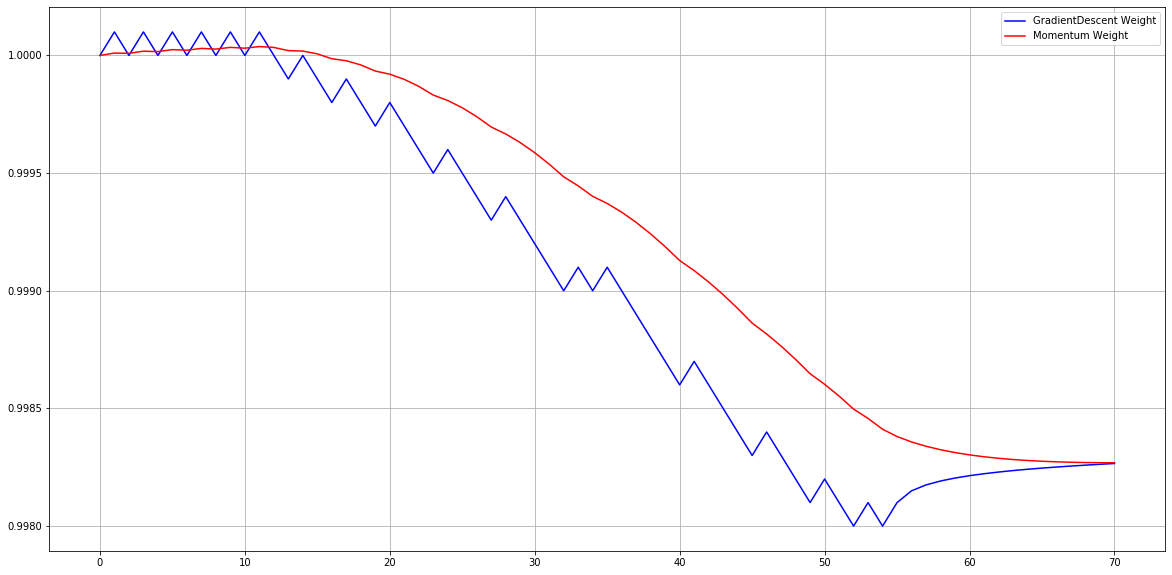

In [76]:
plt.figure(figsize=(20,10))
_iter = list(range(len(gd_history)))
plt.plot(_iter, gd_history, 'b', _iter, mom_history, 'r')
plt.grid()
plt.legend(['GradientDescent Weight', 'Momentum Weight'], loc='best');

### Multi-Class Classification

In [82]:
def create_similar_model(random_state=42, adder=42):
    model = Sequential()
    np.random.seed(random_state+adder)
    model.append(Dense(X.shape[1], 224, 'xavier'))
    model.append(Relu())
    np.random.seed(random_state+2*adder)
    model.append(Dense(224, 224, 'xavier'))
    model.append(Relu())
    np.random.seed(random_state+3*adder)
    model.append(Dense(224, 10, 'xavier'))
    return model

In [86]:
model_1 = create_similar_model()
model_2 = create_similar_model()

In [88]:
gd = GradientDescentOptimizer(model_1, softmax_cross_entropy_with_logits, learning_rate=1e-1)
mom = MomentumOptimizer(model_2, softmax_cross_entropy_with_logits, learning_rate=1e-1)

NameError: name 'softmax_cross_entropy_with_logits' is not defined